In [ ]:
 import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Activation , LSTM , Dropout , AveragePooling3D, Input
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/data (1).csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
X=df.values
X

array([[135, 190, 229, ..., -83, -51,   4],
       [386, 382, 356, ..., 143, 129,   1],
       [-32, -39, -47, ..., -35, -36,   5],
       ...,
       [ 14,   6, -13, ...,  -1,  -8,   5],
       [-40, -25,  -9, ...,  59,  55,   3],
       [ 29,  41,  57, ...,   2,  20,   4]])

In [ ]:
X=X[:,:178]
X

array([[ 135,  190,  229, ..., -116,  -83,  -51],
       [ 386,  382,  356, ...,  154,  143,  129],
       [ -32,  -39,  -47, ...,  -35,  -35,  -36],
       ...,
       [  14,    6,  -13, ...,   -2,   -1,   -8],
       [ -40,  -25,   -9, ...,   68,   59,   55],
       [  29,   41,   57, ...,   -2,    2,   20]])

In [ ]:
from sklearn.model_selection import train_test_split


y=np.array(df['y'])
Y=to_categorical(y)
Y.shape


(11500, 6)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [ ]:
X_train = X_train.reshape(-1,178,1)
X_test = X_test.reshape(-1,178,1)


X_train.shape
X_test.shape

(2300, 178, 1)

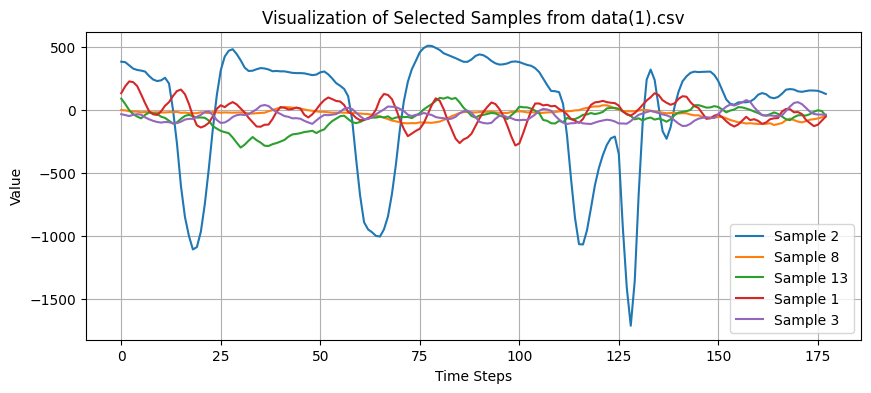

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

# Select a few diverse samples for visualization
sample_indices = [1, 7, 12, 0, 2]

for i in sample_indices:
    plt.plot(X[i,:], label=f'Sample {i+1}')

plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Visualization of Selected Samples from data(1).csv')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model = Sequential()
model.add(Input(shape=(45, 1)))
model.add(LSTM(56, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(56))
model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Activation('tanh'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 45, 56)              │          12,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 45, 56)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 56)                  │          25,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │           1,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,549 (154.49 KB)

 Trainable params: 39,549 (154.49 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)


In [ ]:
X_train_norm = (X_train[:,::4] - X_train.mean()) / X_train.std()
X_test_norm = (X_test[:,::4] - X_test.mean()) / X_test.std()

In [ ]:
hist = model.fit(X_train_norm, Y_train[:,1:],
                 validation_data=(X_test_norm, Y_test[:,1:]),
                 epochs=50,
                 batch_size=15,
                 shuffle=False)

Epoch 1/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.3410 - loss: 0.4711 - val_accuracy: 0.4139 - val_loss: 0.3870
Epoch 2/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.4378 - loss: 0.3822 - val_accuracy: 0.4826 - val_loss: 0.3714
Epoch 3/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.4610 - loss: 0.3753 - val_accuracy: 0.4857 - val_loss: 0.3585
Epoch 4/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.5235 - loss: 0.3425 - val_accuracy: 0.6248 - val_loss: 0.2903
Epoch 5/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6009 - loss: 0.2945 - val_accuracy: 0.6587 - val_loss: 0.2632
Epoch 6/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 44s 44ms/step - accuracy: 0.6408 - loss: 0.2703 - val_accuracy: 0.6700 - val_loss: 0.2507
Epoch 7/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.6723 - loss: 0.2484 - val_accuracy: 0.6878 - val_loss: 0.2400
Epoch 8/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.6766 - loss: 0.2418 - 

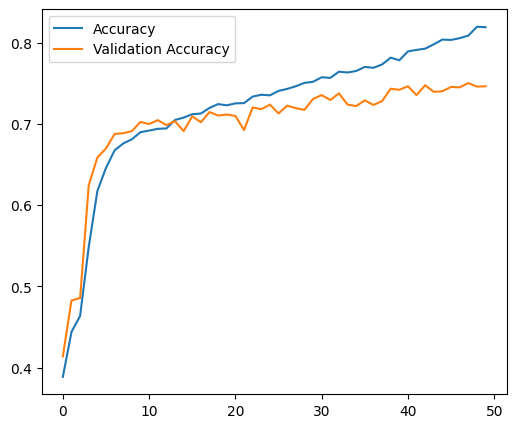

In [ ]:
plt.figure(figsize=(6, 5))
plt.plot(hist.history['accuracy'],label='Accuracy')
plt.plot(hist.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

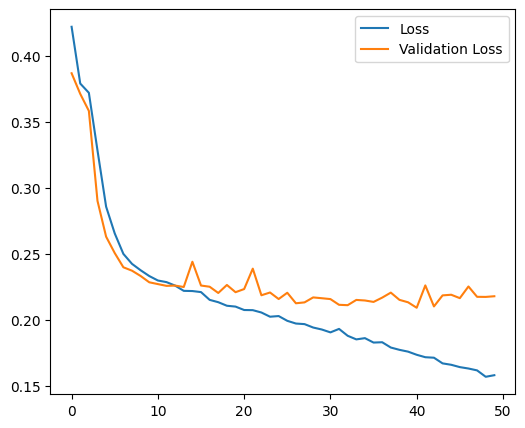

In [ ]:
plt.figure(figsize=(6, 5))
plt.plot(hist.history['loss'],label='Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 45, 56)              │           9,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 45, 56)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 56)                  │          19,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 56)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │           1,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,309 (118.39 KB)

 Trainable params: 30,309 (118.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.3424 - loss: 0.4673 - val_accuracy: 0.4752 - val_loss: 0.3806
Epoch 2/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.5105 - loss: 0.3593 - val_accuracy: 0.6391 - val_loss: 0.2830
Epoch 3/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.6608 - loss: 0.2671 - val_accuracy: 0.6874 - val_loss: 0.2443
Epoch 4/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.6822 - loss: 0.2443 - val_accuracy: 0.6978 - val_loss: 0.2343
Epoch 5/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.6900 - loss: 0.2346 - val_accuracy: 0.6996 - val_loss: 0.2313
Epoch 6/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.6997 - loss: 0.2310 - val_accuracy: 0.6978 - val_loss: 0.2308
Epoch 7/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.7061 - loss: 0.2243 - val_accuracy: 0.7061 - val_loss: 0.2248
Epoch 8/50
614/614 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.7098 - loss: 0.2202 - 

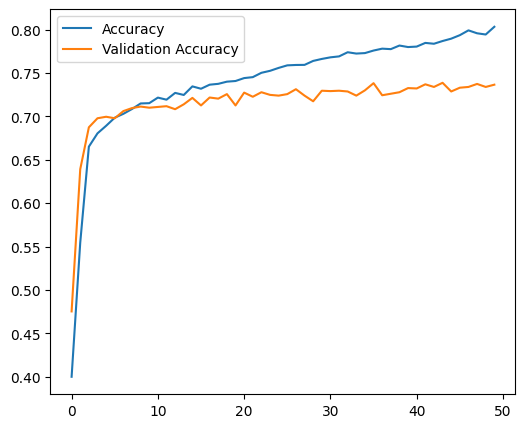

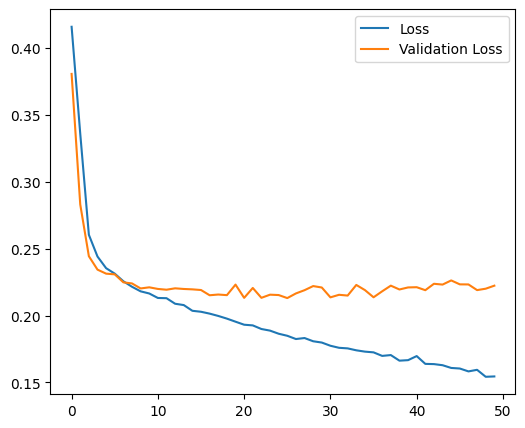

In [ ]:
from keras.layers import GRU


model = Sequential()
model.add(Input(shape=(45, 1)))
model.add(GRU(56, return_sequences=True))
model.add(Dropout(0.3))
model.add(GRU(56))
model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Activation('tanh'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


X_train_norm = (X_train[:,::4] - X_train.mean()) / X_train.std()
X_test_norm = (X_test[:,::4] - X_test.mean()) / X_test.std()


hist = model.fit(X_train_norm, Y_train[:,1:],
                 validation_data=(X_test_norm, Y_test[:,1:]),
                 epochs=50,
                 batch_size=15,
                 shuffle=False)

plt.figure(figsize=(6, 5))
plt.plot(hist.history['accuracy'], label='Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


plt.figure(figsize=(6, 5))
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
